In [5]:
import pandas as pd
df= pd.read_csv('dataWeight.csv')
df.drop('Weight',axis=1,inplace=True)
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [13]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(10,6)

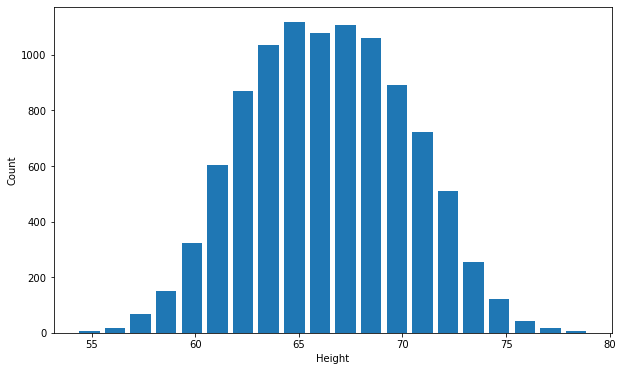

In [15]:
plt.hist(df['Height'],bins=20,rwidth=0.8)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()

In [19]:
df['Height'].min()

54.2631333250971

In [20]:
df['Height'].max()

78.9987423463896

In [21]:
df['Height'].mean()

66.36755975482106

In [22]:
df['Height'].std()

3.8475281207732324

In [25]:
df['Height'].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

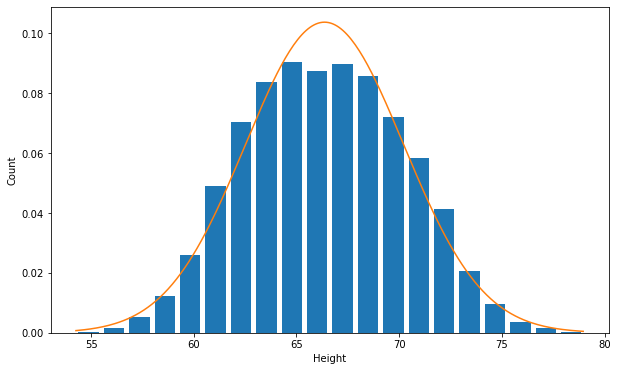

In [28]:
from scipy.stats import norm
import numpy as np

plt.hist(df['Height'],bins=20,rwidth=0.8,density=True)
plt.xlabel('Height')
plt.ylabel('Count')

rng=np.arange(df['Height'].min(),df['Height'].max(),0.1)
plt.plot(rng,norm.pdf(rng,df['Height'].mean(),df['Height'].std()))

In [29]:
upper_limit=df['Height'].mean()+3*df['Height'].std()
upper_limit

77.91014411714076

In [30]:
lower_limit=df['Height'].mean()-3*df['Height'].std()
lower_limit

54.82497539250136

In [32]:
df[(df['Height']<lower_limit) | (df['Height']>upper_limit)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [35]:
final=df[(df['Height']>lower_limit) & (df['Height']<upper_limit)]
final.shape

(9993, 2)

In [36]:
df.shape[0]-final.shape[0]

7

In [39]:
df['zscore']=(df['Height']-df['Height'].mean())/df['Height'].std()
df.head()

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [44]:
df[(df['zscore']>3) | (df['zscore']<-3)]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [46]:
df[(df['zscore']<3) & (df['zscore']>-3)]

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
